# 8 Full analysis of the Lorenz equations - atmospheric convection

In 1963 had Edward Lorenz met de help van Ellen Fetter een gesimplificeerd model gemaakt voor atmosferische convectie. Het model is een systeem van 3 ODE's die nu bekend staan als de Lorenz vergelijkingen:

$$X' = \sigma(Y - X)$$
$$Y' = X(\rho - Z) - Y$$
$$Z' = XY - \beta Z$$

De vergelijkingen relateren de eigenschappen van een 2D vloeistoflaag die uniform verwarmd wordt vanonder en afgekoeld vanboven. Specifiek: de snelheid waarmee de parameters veranderen:
$X \propto$ convectiesnelheid, $Y \propto$ the horizontale temperatuursvariatie en $Z \propto$ verticale temperatuursvariatie. $\rho$,$\beta$ en $\sigma$ worden groter dan nul genomen. Voor deze oefening gebruiken we $\sigma = 10$, $\beta = \frac{8}{3}$ en variëren we $\rho$. 

## 8.1 $\rho < 1$

Welk gedrag heeft het systeem voor $\rho < 1$? Bereken het aantal evenwichten en hun stabiliteiten via de Jacobiaan en toon met een 3D plot:

De jacobiaan is:

$$\begin{bmatrix}
\frac{\partial X'}{\partial X} & \frac{\partial X'}{\partial Y} & \frac{\partial X'}{\partial Z}\\
\frac{\partial Y'}{\partial X} & \frac{\partial Y'}{\partial Y} & \frac{\partial Z'}{\partial Z}\\
\frac{\partial Z'}{\partial X} & \frac{\partial Z'}{\partial Y} & \frac{\partial Z'}{\partial Z}
\end{bmatrix} = \begin{bmatrix}
-\sigma & \sigma & 0\\
\rho - Z & -1 & -X\\
Y & X & -\beta
\end{bmatrix}$$

Er is evenwicht bij $X'=Y'=Z'=0$ en dus 

$$X=Y=\pm\sqrt{\beta(\rho-1)}$$
$$Z = \rho-1$$


In [2]:
from sympy import *
X,Y,Z,sigma,rho,beta = symbols('X Y Z sigma rho beta')
X_ = sigma*(Y - X)
Y_ = X*(rho - Z) - Y
Z_ = X*Y - beta*Z
oplossingen = solve([X_, Y_, Z_], [X, Y, Z]) #da way om 2 vgl op te lossen
print('Er zijn {} oplossingen, namelijk:'.format(len(oplossingen)))
print(oplossingen)

Er zijn 3 oplossingen, namelijk:
[(0, 0, 0), (-sqrt(beta*rho - beta), -sqrt(beta*(rho - 1)), rho - 1), (sqrt(beta*rho - beta), sqrt(beta*(rho - 1)), rho - 1)]


In overeenstemming met de handmatig gevonden oplossingen, nu de jacobiaan:

In [3]:
import numpy as np
jac = Matrix([X_, Y_, Z_]).jacobian([X, Y, Z]) #da way om jac uit te rekenen
jac

Matrix([
[  -sigma, sigma,     0],
[-Z + rho,    -1,    -X],
[       Y,     X, -beta]])

En deze nu invullen met de gevonden oplossingen ne de eigenwaarden berekenen:

### 8.1.1 Oplossing 1

In [6]:
X,Y,Z = symbols('X Y Z')
beta=8/3
sigma=10
X_ = sigma*(Y - X)
Y_ = X*(rho - Z) - Y
Z_ = X*Y - beta*Z
oplossingen = solve([X_, Y_, Z_], [X, Y, Z])
jac = Matrix([X_, Y_, Z_]).jacobian([X, Y, Z]) #da way om jac uit te rekenen
jac_oplossing1_ = jac.subs(X,oplossingen[0][0]).subs(Y,oplossingen[0][1]).subs(Z,oplossingen[0][2])
print('eigenwaarden:')
print(list(jac_oplossing1_.subs(rho,0.5).eigenvals()))

eigenwaarden:
[-10.5249378105604, -0.475062189439555, -2.66666666666667]


Dit is dus een stabiel evenwicht

### 8.1.2 Oplossing 2

Eerst de Jacobiaan: (oplossing 1 is fysisch niet relevant dus wordt overgeslagen)

In [4]:
jac_oplossing2 = jac.subs(X,oplossingen[1][0]).subs(Y,oplossingen[1][1]).subs(Z,oplossingen[1][2])
jac_oplossing2

Matrix([
[               -sigma,                  sigma,                     0],
[                    1,                     -1, sqrt(beta*rho - beta)],
[-sqrt(beta*(rho - 1)), -sqrt(beta*rho - beta),                 -beta]])

In [5]:
X,Y,Z = symbols('X Y Z')
beta=8/3
sigma=10
X_ = sigma*(Y - X)
Y_ = X*(rho - Z) - Y
Z_ = X*Y - beta*Z
oplossingen = solve([X_, Y_, Z_], [X, Y, Z])
jac = Matrix([X_, Y_, Z_]).jacobian([X, Y, Z]) #da way om jac uit te rekenen
jac_oplossing2_ = jac.subs(X,oplossingen[1][0]).subs(Y,oplossingen[1][1]).subs(Z,oplossingen[1][2])
jac_oplossing2_

Matrix([
[                              -10,                              10,                              0],
[                              1.0,                              -1, 1.63299316185545*sqrt(rho - 1)],
[-1.63299316185545*sqrt(rho - 1.0), -1.63299316185545*sqrt(rho - 1),              -2.66666666666667]])

Nu de eigenwaarden:

In [6]:
print('eigenwaarden:')
print(list(jac_oplossing2_.subs(rho,0.5).eigenvals()))

eigenwaarden:
[-10.8631806281848, 0.700555417378654, -3.50404145586048]


Aangezien dat voor alle $\rho<1$ er geen eigenwaardes zijn met 0 als reeël deel is de jacobiaan een qualitatieve linearizatie in het equilibrium

Deze oplossing is instabiel

### 8.1.3 Oplossing 3

In [7]:
X,Y,Z = symbols('X Y Z')
beta=8/3
sigma=10
X_ = sigma*(Y - X)
Y_ = X*(rho - Z) - Y
Z_ = X*Y - beta*Z
oplossingen = solve([X_, Y_, Z_], [X, Y, Z])
jac = Matrix([X_, Y_, Z_]).jacobian([X, Y, Z]) #da way om jac uit te rekenen
jac_oplossing3_ = jac.subs(X,oplossingen[2][0]).subs(Y,oplossingen[2][1]).subs(Z,oplossingen[2][2])
jac_oplossing3_

Matrix([
[                             -10,                             10,                               0],
[                             1.0,                             -1, -1.63299316185545*sqrt(rho - 1)],
[1.63299316185545*sqrt(rho - 1.0), 1.63299316185545*sqrt(rho - 1),               -2.66666666666667]])

In [8]:
print('eigenwaarden:')
print(list(jac_oplossing2_.subs(rho,0.5).eigenvals()))

eigenwaarden:
[-10.8631806281848, 0.700555417378654, -3.50404145586048]


Deze is dus ook onstabiel, de enige stabiele is (0,0,0)

### 8.1.3 Gedrag

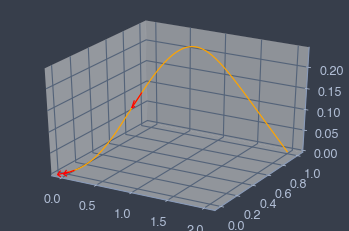

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
stapgrootte = 0.01
T = np.arange(0,500,stapgrootte)
def vergelijkingen(X,Y,Z,rho,beta=8/3,sigma=10):
    X_ = sigma*(Y - X)
    Y_ = X*(rho - Z) - Y
    Z_ = X*Y - beta*Z
    return [X_,Y_,Z_]
def euler(Xinit,Yinit,Zinit,rho,stapgrootte=stapgrootte,periode=len(T)):
    X,Y,Z = Xinit,Yinit,Zinit
    x,y,z = [],[],[]
    dx,dy,dz = [],[],[]
    for stap in range(periode):
        x.append(X)
        y.append(Y)
        z.append(Z)
        dx.append(vergelijkingen(x[-1],y[-1],z[-1],rho)[0])
        dy.append(vergelijkingen(x[-1],y[-1],z[-1],rho)[1])
        dz.append(vergelijkingen(x[-1],y[-1],z[-1],rho)[2])
        X += stapgrootte*dx[-1]
        Y += stapgrootte*dy[-1]
        Z += stapgrootte*dz[-1]
    return x,y,z,dx,dy,dz
ax = plt.axes(projection ="3d")
randomlist = random.sample(range(0, 5), 3)
x,y,z,dx,dy,dz = euler(randomlist[0],randomlist[1],randomlist[2],0.4)
ax = plt.axes(projection ="3d")
for i in range(100,1000,400): #range(start,stop,step)
    ax.quiver(
        x[i],y[i],z[i], # <-- starting point of vector
        dx[i],dy[i],dz[i], # <-- directions of vector
        color = 'red',length=0.1,normalize=True
    )
ax.plot(x,y,z,color = 'orange')
plt.show()

We zien dus dat elke startconfiguratie neigt naar (0,0,0)

### 8.2 $\rho$ varieëren en laten 1 passeren, welke bifuricatie treedt er op?

<IPython.core.display.Javascript object>


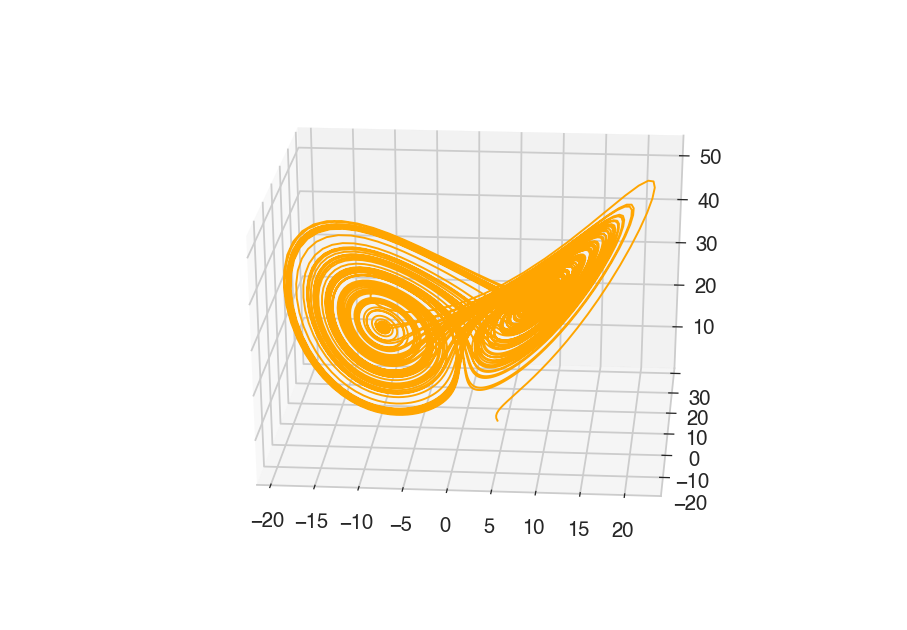

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
ax = plt.axes(projection ="3d")
def vergelijkingen(X,Y,Z,rho,beta=8/3,sigma=10):
    X_ = sigma*(Y - X)
    Y_ = X*(rho - Z) - Y
    Z_ = X*Y - beta*Z
    return [X_,Y_,Z_]
stapgrootte = 0.01
T = np.arange(0,100,stapgrootte)

def euler(Xinit,Yinit,Zinit,rho,stapgrootte=stapgrootte,periode=len(T)):
    X,Y,Z = Xinit,Yinit,Zinit
    x,y,z = [],[],[]
    for stap in range(periode):
        x.append(X)
        y.append(Y)
        z.append(Z)
        X += stapgrootte*vergelijkingen(x[-1],y[-1],z[-1],rho)[0]
        Y += stapgrootte*vergelijkingen(x[-1],y[-1],z[-1],rho)[1]
        Z += stapgrootte*vergelijkingen(x[-1],y[-1],z[-1],rho)[2]
    return x,y,z
ax = plt.axes(projection ="3d")
randomlist = random.sample(range(0, 5), 3)
x,y,z = euler(randomlist[0],randomlist[1],randomlist[2],28)
ax.plot(x,y,z,color = 'orange')
plt.show()